# 1. Keras 이해

- Keras는 딥러닝 모델을 만들기 위한 고수준의 구성 요소를 제공하는 모델 수준의 라이브러리
- 텐서 조작이나 미분과 같은 저수준의 연산을 다루지 않는다.
- Keras의 백엔드 엔진( Backend Enging )에서 제공하는 최적화되고 특화된 텐서 라이브러리를 사용한다.
- Keras는 모듈 구조로 구성되어 있기 때문에 여러 백엔드 엔진과 매끄럽게 연동된다.
- Keras 백엔드 엔진으로는 Tensorflow, 씨아노( theano ), CNTK등이 있다.

https://keras.io/  
https://keras.io/ko/

## 1. 모델링( Modeling )

- Sequential() : 계층을 구성하기 위한 모델 생성 객체, 객체 생성후 필요한 층( Layer )을 추가한다.
    
    from tensorflow.keras.models import Sequential
    
    model = Sequential()  
    model.add( ... ) # 층( layer ) 추가  
    model.add( ... ) # 층( layer ) 추가  
    ...

- Dense() : 전결합층( fully-conntected layer )을 추가시 사용하는 객체, model.add()로 추가한다.
  
    첫번째 인자 : 출력 뉴런의 수  
    input_dim : 입력 뉴런의 수( 입력 차원 )  
    activation : 활성화 함수  
        - linear : default 값, 선형회귀
        - sigmoid : 이진분류
        - softmax : 다중 클래스 분류
        - relu : deep learning의 은닉층에서 사용

## 2. 컴파일( Compile )

- compile() : 모델을 기계가 이해할 수 있도록 컴파일한다. 오차함수, 최적화 방법, 메트릭( metric ) 함수를 선택할 수 인다.
    optimizer : 훈련 과정을 설정하는 옵티마이저를 설정한다.  
    loss : 훈련 과정에서 사용할 손실함수( loss function )를 설정한다.  
    metrics : 훈련을 모니터링하기 위한 지표를 선택
    
    model = Sequential()
    model.add( Dense( 1, input_dim = 1, activation = 'linear' )
    sgd = optimizers.SGD( lr = 0.01 )
    model.compile( optimizer = sgd, loss = 'mean_squared_error',
                   metrics = [ 'mse' ] )  
    
    
    대표적 손실 함수와 활성화( 옵티마이저 ) 함수 조합
    
|문제유형|손실함수|활성화(옵티마이저)|
|:---|:---|:---|
|회귀문제|mean_sequared_error||
|다중클래스 분류문제|categorical_crossentropy|softmax|
|다중클래스 분류문제|sparse_categorical_crossentropy|softmax|
|이진 분류문제|binary_crossentropy|sigmoid|

## 3. 훈련( Training )

- fit() : 모델을 학습한다. 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련 또는 적합( fitting )이라고 하기도 하는데 모델이 데이터에 적합해가는 과정이기 때문이며, fit()은 모델의 훈련을 시작한다는 의미를 가지고 있다.

    model.fit( X_train, y_train, epochs = 10, batch_size = 32 )
    
    첫번째 인자 : 훈련 데이터에 해당  
    두번째 인자 : 지도 학습의 레이블 데이터에 해당  
    epochs : 에포크, 에포크 1은 전체 데이터를 한 차례 훈련( 학습 )하였다는 의미로 정수값으로 기재하며, 훈련 횟수를 정의한다.  
    batch_size : 배치 크기, default값 32, 미니 배치 경사 하강법을 사용하고 싶지 않을 때는 batch_size = None을 기재  
    validation_data( x_val, y_val ) : 검증 데이터( validation data )를 사용한다. 검증 데이터를 사용하면 에포크마다 검증 데이터의 정확도도 함께 출력되는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐 실제 검증 데이터를 학습하지는 않는다. 검증 데이터의 loss가 낮아지다가 높아지기 시작하면 이는 과적합( overfitting )의 신호  
    validation_split = 정수 : validation_data 대신 사용할 수 있다. 검증 데이터를 사용하는 것은 동일하지만, 별도로 존재하는 검증 데이터를 주는 것이 아니라 X_train과 y_train의 일정 비율을 분리하여 이를 검증 데이터로 사용한다.  
    vorbose : 학습 중 출력되는 문구 설정  
        - 0 : 아무것도 출력되지 않는다.  
        - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여준다.  
        - 2 : 미니 배치마다 손실 정보를 출력한다.  

## 4. 평가( Evaluation )와 예측( Prediction )

- evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가한다.

    model.evaluate( X_test, y_test, batch_size = 32 )
    
    첫번째 인자 : 테스트 데이터에 해당  
    두번째 인자 : 지도 학습에서 레이블 데이터에 해당  
    batch_size : 배치 크기  

- predict() : 임의의 입력에 대한 모델의 출력값 확인
    
    model.predict( X_input, batch_size = 32 )
    
    첫번째 인자 : 예측하고자 하는 데이터  
    batch_size : 배치 크기

## 5. 모델 저장( save )과 로드( Load )

- save() : 모델을 hdf5 형식의 파일로 저장

    model.save( 'model.h5' )
    
- load() : 모델을 메모리로 로드

    from tensorflow.keras.models import load_model
    
    model = load_model( 'model.h5' )


# 2. 선형 회귀( Linear Regression ) 모델 구현

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split

In [21]:
X = np.array( [ 1, 2, 3, 4, 5, 6, 7, 8, 9 ] ) # 공부 시간
y = np.array( [ 11, 22, 33, 44, 53, 66, 77, 87, 95 ] ) # 공부 시간에 따른 성적

In [22]:
# Sequential Model 생성 및 Dense layer 추가
model = Sequential()
model.add( Dense( 1, input_dim = 1, activation = 'linear' ) )

In [28]:
# Sequential Model compile
sgd = optimizers.SGD( lr = 0.01 ) # 확률적 경사하강법, 학습률 0.01로 설정
model.compile( optimizer = sgd, loss = 'mean_squared_error',
               metrics = [ 'mse' ], shuffle = False )
# optimizer는 sgd
# loss function는 평균제곱오차( MSE ) 사용
# 측정항목은 평균제곱오차값

In [29]:
# Sequential Model 훈련
history = model.fit( X, y, batch_size = 1, epochs = 300 )
# X, y데이터에 대하여 오차를 최소화하는 작업을 300번 시도한다.

Train on 9 samples
Epoch 1/300
9/9 [==============================] - 0s 21ms/sample - loss: 3.3498 - mse: 3.3498
Epoch 2/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.8716 - mse: 1.8716
Epoch 3/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.4961 - mse: 1.4961
Epoch 4/300
9/9 [==============================] - 0s 997us/sample - loss: 2.3914 - mse: 2.3914
Epoch 5/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.4855 - mse: 3.4855
Epoch 6/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.0172 - mse: 2.0172
Epoch 7/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.2222 - mse: 1.2222
Epoch 8/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.2373 - mse: 3.2373
Epoch 9/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.3156 - mse: 3.3156
Epoch 10/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.9573 - mse: 2.9573
Epoch 11/300
9/9 [===================

9/9 [==============================] - 0s 1ms/sample - loss: 0.6335 - mse: 0.6335
Epoch 172/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.0837 - mse: 3.0837
Epoch 173/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.5885 - mse: 2.5885
Epoch 174/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.4314 - mse: 1.4314
Epoch 175/300
9/9 [==============================] - 0s 994us/sample - loss: 3.1959 - mse: 3.1959
Epoch 176/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.2829 - mse: 3.2829
Epoch 177/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.0995 - mse: 1.0995
Epoch 178/300
9/9 [==============================] - 0s 887us/sample - loss: 2.3236 - mse: 2.3236
Epoch 179/300
9/9 [==============================] - 0s 1ms/sample - loss: 0.9985 - mse: 0.9985
Epoch 180/300
9/9 [==============================] - 0s 997us/sample - loss: 1.0161 - mse: 1.0161
Epoch 181/300
9/9 [=============================

In [30]:
# 모델 평가
model.evaluate( X, y, batch_size = 1 )

9/1 [==============================================================================================================================================================================================================================================================================] - 0s 7ms/sample - loss: 4.9478 - mse: 1.4595


[1.4594942968364597, 1.4594942]

In [31]:
print( model.evaluate( X, y, batch_size = 1 ) )

9/1 [==============================================================================================================================================================================================================================================================================] - 0s 792us/sample - loss: 4.9478 - mse: 1.4595
[1.4594942968364597, 1.4594942]


In [32]:
# 예측
model.predict( [ 9.5 ] )

array([[103.29136]], dtype=float32)

In [33]:
history.history.keys()

dict_keys(['loss', 'mse'])

In [34]:
print( history.history[ 'loss' ] ) 

[3.349757709178246, 1.8716036718752649, 1.4961403887718916, 2.3914347675939402, 3.4855254706409244, 2.0172482712401285, 1.2221508059236739, 3.2372509295431278, 3.3156117879682117, 2.957328068713347, 2.8981513519667916, 4.034854768051042, 3.277387264003563, 3.894592905210124, 3.687365541027652, 3.7286638469538755, 3.2133723774717913, 2.3454455520129867, 1.5663471430954006, 3.412765459054046, 3.4523963570180864, 1.0687213842239645, 3.190812691425284, 2.604135353739063, 1.575559842089812, 3.1573361413449876, 2.327877371261517, 1.4109032557656367, 2.931410503502573, 3.5291781817148955, 1.685114918794069, 3.9843541646583214, 2.1385108021398387, 6.073607974582249, 4.026147997213735, 2.550560176857592, 1.5716922361817625, 2.7706229666041002, 1.6601647247508582, 4.228277555511643, 4.4990286930567684, 1.3541637253430154, 3.2807594653632908, 2.496821441642371, 1.9106164298330743, 3.4726429250505237, 3.9429017928325467, 2.3287149069623814, 1.569692502833075, 2.7780320865826473, 4.814427406009701,

In [35]:
print( history.history[ 'mse' ] )

[3.3497574, 1.8716036, 1.4961404, 2.3914347, 3.4855254, 2.0172484, 1.2221508, 3.2372508, 3.3156118, 2.957328, 2.8981514, 4.034855, 3.2773874, 3.8945928, 3.6873655, 3.728664, 3.2133725, 2.3454454, 1.5663471, 3.4127655, 3.4523962, 1.0687213, 3.1908128, 2.604135, 1.5755599, 3.1573362, 2.3278775, 1.4109033, 2.9314106, 3.5291781, 1.685115, 3.9843543, 2.1385107, 6.0736084, 4.026148, 2.5505602, 1.5716922, 2.7706232, 1.6601647, 4.2282777, 4.4990287, 1.3541636, 3.2807593, 2.4968214, 1.9106164, 3.4726431, 3.942902, 2.328715, 1.5696925, 2.778032, 4.814427, 2.5238838, 3.5932782, 1.5305959, 2.1461523, 1.083756, 4.5138397, 2.2829196, 1.7025748, 2.0901043, 3.388123, 2.156804, 3.5028965, 2.3333988, 3.7129457, 2.7450972, 3.6607938, 5.5877066, 2.0692914, 3.4093666, 1.6455164, 2.519782, 2.2384417, 3.585083, 2.3038583, 2.6171136, 2.1033525, 5.529783, 3.743841, 3.6047125, 3.4046469, 2.199973, 2.5325797, 3.4769585, 2.6584613, 4.0122547, 3.1603189, 3.3516042, 2.909707, 1.7938601, 3.1570625, 2.3880122, 4.7720

In [36]:
loss = history.history[ 'loss' ]
epochs = range( 1, len( loss ) + 1 )

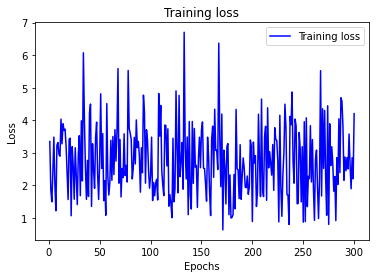

In [37]:
plt.plot( epochs, loss, 'b', label = 'Training loss' )
plt.title( 'Training loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

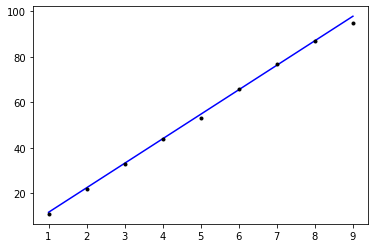

In [38]:
plt.plot( X, model.predict( X ), 'b', X, y, 'k.' )

### 검증 데이터 적용

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,
                                                     random_state = 1234 )

In [41]:
print( X_train, len( X_train ), y_train, len( y_train ) )

[2 1 8 5 6 7 4] 7 [22 11 87 53 66 77 44] 7


In [42]:
print( X_test, len( X_test ), y_test, len( y_test ) )

[9 3] 2 [95 33] 2


In [45]:
# 훈련 데이터에서 검증 데이터와 훈련 데이터로 분리
X_val = X_train[ :2 ]
partial_X_val = X_train[ 2: ]
y_val = y_train[ :2 ]
partial_y_val = y_train[ 2: ]

In [46]:
print( X_val, len( X_val ), partial_X_val, len( partial_X_val ) )

[2 1] 2 [8 5 6 7 4] 5


In [47]:
print( y_val, len( y_val ), partial_y_val, len( partial_y_val ) )

[22 11] 2 [87 53 66 77 44] 5


In [49]:
model = Sequential()
model.add( Dense( 1, input_dim = 1, activation = 'linear' ) )
sgd = optimizers.SGD( lr = 0.01 )
model.compile( optimizer = sgd, loss = 'mse', metrics = [ 'mse' ] )
history = model.fit( partial_X_val, partial_y_val, batch_size = 1,
                     epochs = 300, validation_data = ( X_val, y_val ) )

Train on 5 samples, validate on 2 samples
Epoch 1/300
5/5 [==============================] - 0s 46ms/sample - loss: 1138.2692 - mse: 1138.2692 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 2/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9575 - mse: 0.9575 - val_loss: 1.3054 - val_mse: 1.3054
Epoch 3/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.4370 - mse: 1.4370 - val_loss: 1.3633 - val_mse: 1.3633
Epoch 4/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.7399 - mse: 0.7399 - val_loss: 0.4868 - val_mse: 0.4868
Epoch 5/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.2569 - mse: 1.2569 - val_loss: 1.3550 - val_mse: 1.3550
Epoch 6/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.1969 - mse: 1.1969 - val_loss: 1.0436 - val_mse: 1.0436
Epoch 7/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.2392 - mse: 1.2392 - val_loss: 0.6100 - val_mse: 0.6100
Epoch 8/300
5/5 [=================

Epoch 124/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.0695 - mse: 1.0695 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 125/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.2733 - mse: 1.2733 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 126/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.1520 - mse: 1.1520 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 127/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.1911 - mse: 1.1911 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 128/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.1388 - mse: 1.1388 - val_loss: 0.0674 - val_mse: 0.0674
Epoch 129/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.3094 - mse: 1.3094 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 130/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.4775 - mse: 1.4775 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 131/300
5/5 [==============================] - 0s 3ms/sample - 

5/5 [==============================] - 0s 3ms/sample - loss: 1.7704 - mse: 1.7704 - val_loss: 0.0497 - val_mse: 0.0497
Epoch 246/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9693 - mse: 0.9693 - val_loss: 0.1543 - val_mse: 0.1543
Epoch 247/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.4609 - mse: 1.4609 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 248/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9525 - mse: 0.9525 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 249/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9357 - mse: 0.9357 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 250/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.3937 - mse: 1.3937 - val_loss: 0.1179 - val_mse: 0.1179
Epoch 251/300
5/5 [==============================] - 0s 4ms/sample - loss: 1.4777 - mse: 1.4777 - val_loss: 0.0941 - val_mse: 0.0941
Epoch 252/300
5/5 [==============================] - 0s 4ms/sample - loss: 1.1947 -

In [50]:
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

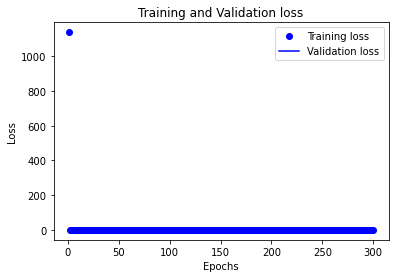

In [52]:
plt.plot( epochs, loss, 'bo', label = 'Training loss' )
plt.plot( epochs, val_loss, 'b', label = 'Validation loss' )
plt.title( 'Training and Validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

In [53]:
evaluate = model.evaluate( X_test, y_test )

2/1 [============================================================] - 0s 27ms/sample - loss: 1.6497 - mse: 1.6497


In [54]:
evaluate

[1.6497218608856201, 1.6497219]

In [55]:
model.predict( X_test )

array([[96.53539 ],
       [32.029427]], dtype=float32)

### 검증용 데이터 - 비율

In [56]:
model = Sequential()
model.add( Dense( 1, input_dim = 1, activation = 'linear' ) )
sgd = optimizers.SGD( lr = 0.01 )
model.compile( optimizer = sgd, loss = 'mse', metrics = [ 'mse' ] )
history = model.fit( X_train, y_train, batch_size = 1,
                     epochs = 300, validation_split = 0.2 )

Train on 5 samples, validate on 2 samples
Epoch 1/300
5/5 [==============================] - 0s 47ms/sample - loss: 893.7229 - mse: 893.7230 - val_loss: 3.6635 - val_mse: 3.6635
Epoch 2/300
5/5 [==============================] - 0s 3ms/sample - loss: 3.3432 - mse: 3.3432 - val_loss: 0.3983 - val_mse: 0.3983
Epoch 3/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.5108 - mse: 1.5108 - val_loss: 2.5163 - val_mse: 2.5163
Epoch 4/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.5602 - mse: 1.5602 - val_loss: 0.2459 - val_mse: 0.2459
Epoch 5/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.1231 - mse: 1.1231 - val_loss: 3.4315 - val_mse: 3.4315
Epoch 6/300
5/5 [==============================] - 0s 3ms/sample - loss: 2.6408 - mse: 2.6408 - val_loss: 0.2224 - val_mse: 0.2224
Epoch 7/300
5/5 [==============================] - 0s 3ms/sample - loss: 2.0241 - mse: 2.0241 - val_loss: 0.2608 - val_mse: 0.2608
Epoch 8/300
5/5 [===================

Epoch 63/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9695 - mse: 0.9695 - val_loss: 1.7160 - val_mse: 1.7160
Epoch 64/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9229 - mse: 0.9229 - val_loss: 0.4541 - val_mse: 0.4541
Epoch 65/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.5743 - mse: 0.5743 - val_loss: 2.4587 - val_mse: 2.4587
Epoch 66/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9595 - mse: 0.9595 - val_loss: 0.4453 - val_mse: 0.4453
Epoch 67/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9555 - mse: 0.9555 - val_loss: 0.4824 - val_mse: 0.4824
Epoch 68/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.8328 - mse: 0.8328 - val_loss: 1.6698 - val_mse: 1.6698
Epoch 69/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.8012 - mse: 0.8012 - val_loss: 2.4161 - val_mse: 2.4161
Epoch 70/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.

Epoch 125/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9739 - mse: 0.9739 - val_loss: 1.6457 - val_mse: 1.6457
Epoch 126/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.0785 - mse: 1.0785 - val_loss: 0.1351 - val_mse: 0.1351
Epoch 127/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9298 - mse: 0.9298 - val_loss: 0.1376 - val_mse: 0.1376
Epoch 128/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.8661 - mse: 0.8661 - val_loss: 1.6502 - val_mse: 1.6502
Epoch 129/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.0962 - mse: 1.0962 - val_loss: 0.2824 - val_mse: 0.2824
Epoch 130/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.7322 - mse: 0.7322 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 131/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.8745 - mse: 0.8745 - val_loss: 0.3239 - val_mse: 0.3239
Epoch 132/300
5/5 [==============================] - 0s 3ms/sample - 

5/5 [==============================] - 0s 3ms/sample - loss: 1.0444 - mse: 1.0444 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 248/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.5373 - mse: 0.5373 - val_loss: 2.4557 - val_mse: 2.4557
Epoch 249/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.9240 - mse: 0.9240 - val_loss: 0.5012 - val_mse: 0.5012
Epoch 250/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.8741 - mse: 0.8741 - val_loss: 0.1293 - val_mse: 0.1293
Epoch 251/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.7937 - mse: 0.7937 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 252/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.8985 - mse: 0.8985 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 253/300
5/5 [==============================] - 0s 3ms/sample - loss: 1.0253 - mse: 1.0253 - val_loss: 0.1607 - val_mse: 0.1607
Epoch 254/300
5/5 [==============================] - 0s 3ms/sample - loss: 0.7749 -

In [57]:
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

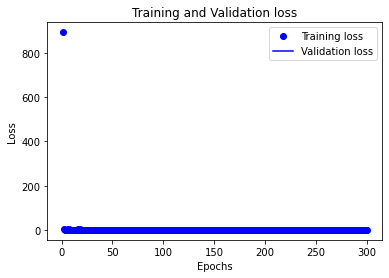

In [58]:
plt.plot( epochs, loss, 'bo', label = 'Training loss' )
plt.plot( epochs, val_loss, 'b', label = 'Validation loss' )
plt.title( 'Training and Validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

In [59]:
evaluate = model.evaluate( X_test, y_test )

2/1 [============================================================] - 0s 28ms/sample - loss: 7.1049 - mse: 7.1049


In [60]:
evaluate

[7.104852676391602, 7.1048527]

In [61]:
model.predict( X_test )

array([[98.768936],
       [32.930534]], dtype=float32)

# 3. 다중 선형 회귀( Multiple Linear Regression ) 모델

- 독립 변수가 2개이상이다.
- 이는 모델을 직접 코딩하는 관점에서는 입력 벡터의 차원이 2이상이라고 할 수 있다.
- y를 결정하는데 있어 독립 변수가 3개인 선형 회귀
- 중간 고사, 기발 고사, 그리고 추가 점수를 어떤 공식을 통해 최종 점수를 계산한 데이터가 있가.

|Midterm( X1 )|Final( X2 )|Added point( X3 )|Score( y )|
|---:|---:|---:|---:|
|70|85|11|73|
|71|89|18|82|
|50|80|20|72|
|99|20|10|57|
|50|10|10|34|
|20|99|10|58|
|40|50|20|56|

## 1. 가설( Hypothesis )

\begin{equation*}
    H( X ) = W_1X_1 + W_2X_2 + W_3X_3 + b
\end{equation*}

## 2. 데이터 수집 & 분리

In [63]:
# 입력 벡터의 차원은 3( x가 3개 )으로, input_dim = 3을 부여
X = np.array( [ [ 70, 85, 11 ], [ 71, 89, 18 ], [ 50, 80, 20 ], [ 99, 20, 10 ],
                [ 50, 10, 10 ], [ 20, 99, 10 ], [ 40, 50, 20 ] ] ) 
# 출력 벡터의 차원은 1( y가 1개 )으로, output_dim = 1을 부여
y = np.array( [ 73, 82, 72, 57, 34, 58, 56 ] )

In [64]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,
                                                     random_state = 1234 )

In [65]:
print( X_train, y_train )

[[40 50 20]
 [70 85 11]
 [50 10 10]
 [20 99 10]
 [99 20 10]] [56 73 34 58 57]


In [66]:
print( X_test, y_test )

[[50 80 20]
 [71 89 18]] [72 82]


## 3. 다중 선형 회귀 모델 구성

In [67]:
model = Sequential()
model.add( Dense( 1, input_dim = 3, activation = 'linear' ) )
sgd = optimizers.SGD( lr = 0.00001 )
model.compile( optimize = sgd, loss = 'mse', metrics = [ 'mse' ] )
history = model.fit( X_train, y_train, batch_size = 1, epochs = 2000,
                     validation_split = 0.2, shuffle = False )

Train on 4 samples, validate on 1 samples
Epoch 1/2000
4/4 [==============================] - 0s 120ms/sample - loss: 6913.1033 - mse: 6913.1035 - val_loss: 1120.7441 - val_mse: 1120.7441
Epoch 2/2000
4/4 [==============================] - 0s 3ms/sample - loss: 6805.6800 - mse: 6805.6802 - val_loss: 1159.3149 - val_mse: 1159.3149
Epoch 3/2000
4/4 [==============================] - 0s 3ms/sample - loss: 6731.5409 - mse: 6731.5410 - val_loss: 1192.8414 - val_mse: 1192.8414
Epoch 4/2000
4/4 [==============================] - 0s 3ms/sample - loss: 6666.7608 - mse: 6666.7607 - val_loss: 1224.1985 - val_mse: 1224.1985
Epoch 5/2000
4/4 [==============================] - 0s 3ms/sample - loss: 6606.6638 - mse: 6606.6641 - val_loss: 1254.4952 - val_mse: 1254.4952
Epoch 6/2000
4/4 [==============================] - 0s 3ms/sample - loss: 6549.3087 - mse: 6549.3086 - val_loss: 1284.2756 - val_mse: 1284.2756
Epoch 7/2000
4/4 [==============================] - 0s 3ms/sample - loss: 6493.7169 - mse: 6

Epoch 57/2000
4/4 [==============================] - 0s 3ms/sample - loss: 4248.6197 - mse: 4248.6196 - val_loss: 3071.3550 - val_mse: 3071.3550
Epoch 58/2000
4/4 [==============================] - 0s 3ms/sample - loss: 4211.9849 - mse: 4211.9849 - val_loss: 3111.8594 - val_mse: 3111.8594
Epoch 59/2000
4/4 [==============================] - 0s 3ms/sample - loss: 4175.6627 - mse: 4175.6626 - val_loss: 3152.5237 - val_mse: 3152.5237
Epoch 60/2000
4/4 [==============================] - 0s 3ms/sample - loss: 4139.6525 - mse: 4139.6523 - val_loss: 3193.3389 - val_mse: 3193.3389
Epoch 61/2000
4/4 [==============================] - 0s 3ms/sample - loss: 4103.9539 - mse: 4103.9541 - val_loss: 3234.3040 - val_mse: 3234.3040
Epoch 62/2000
4/4 [==============================] - 0s 4ms/sample - loss: 4068.5650 - mse: 4068.5649 - val_loss: 3275.4121 - val_mse: 3275.4121
Epoch 63/2000
4/4 [==============================] - 0s 3ms/sample - loss: 4033.4868 - mse: 4033.4868 - val_loss: 3316.6631 - val_

4/4 [==============================] - 0s 3ms/sample - loss: 1823.2412 - mse: 1823.2412 - val_loss: 7288.9087 - val_mse: 7288.9087
Epoch 170/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1813.1409 - mse: 1813.1409 - val_loss: 7310.9990 - val_mse: 7310.9990
Epoch 171/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1803.1640 - mse: 1803.1641 - val_loss: 7332.6650 - val_mse: 7332.6650
Epoch 172/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1793.3084 - mse: 1793.3083 - val_loss: 7353.9023 - val_mse: 7353.9023
Epoch 173/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1783.5721 - mse: 1783.5720 - val_loss: 7374.7124 - val_mse: 7374.7124
Epoch 174/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1773.9532 - mse: 1773.9531 - val_loss: 7395.0996 - val_mse: 7395.0996
Epoch 175/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1764.4493 - mse: 1764.4492 - val_loss: 7415.0610 - val_mse: 741

4/4 [==============================] - 0s 3ms/sample - loss: 1133.8530 - mse: 1133.8530 - val_loss: 7616.0537 - val_mse: 7616.0537
Epoch 282/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1129.8254 - mse: 1129.8254 - val_loss: 7605.4946 - val_mse: 7605.4946
Epoch 283/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1125.8170 - mse: 1125.8170 - val_loss: 7594.7944 - val_mse: 7594.7944
Epoch 284/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1121.8265 - mse: 1121.8265 - val_loss: 7583.9580 - val_mse: 7583.9580
Epoch 285/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1117.8535 - mse: 1117.8535 - val_loss: 7572.9912 - val_mse: 7572.9912
Epoch 286/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1113.8987 - mse: 1113.8987 - val_loss: 7561.8940 - val_mse: 7561.8940
Epoch 287/2000
4/4 [==============================] - 0s 4ms/sample - loss: 1109.9613 - mse: 1109.9613 - val_loss: 7550.6621 - val_mse: 755

Epoch 394/2000
4/4 [==============================] - 0s 3ms/sample - loss: 759.0643 - mse: 759.0643 - val_loss: 5912.4824 - val_mse: 5912.4824
Epoch 395/2000
4/4 [==============================] - 0s 3ms/sample - loss: 756.2714 - mse: 756.2714 - val_loss: 5895.2759 - val_mse: 5895.2759
Epoch 396/2000
4/4 [==============================] - 0s 3ms/sample - loss: 753.4858 - mse: 753.4858 - val_loss: 5878.0708 - val_mse: 5878.0708
Epoch 397/2000
4/4 [==============================] - 0s 3ms/sample - loss: 750.7074 - mse: 750.7074 - val_loss: 5860.8540 - val_mse: 5860.8540
Epoch 398/2000
4/4 [==============================] - 0s 3ms/sample - loss: 747.9361 - mse: 747.9362 - val_loss: 5843.6338 - val_mse: 5843.6338
Epoch 399/2000
4/4 [==============================] - 0s 3ms/sample - loss: 745.1718 - mse: 745.1718 - val_loss: 5826.4092 - val_mse: 5826.4092
Epoch 400/2000
4/4 [==============================] - 0s 3ms/sample - loss: 742.4149 - mse: 742.4149 - val_loss: 5809.1841 - val_mse: 58

Epoch 451/2000
4/4 [==============================] - 0s 3ms/sample - loss: 610.7360 - mse: 610.7360 - val_loss: 4936.6782 - val_mse: 4936.6782
Epoch 452/2000
4/4 [==============================] - 0s 3ms/sample - loss: 608.3219 - mse: 608.3219 - val_loss: 4919.8730 - val_mse: 4919.8730
Epoch 453/2000
4/4 [==============================] - 0s 4ms/sample - loss: 605.9140 - mse: 605.9140 - val_loss: 4903.0830 - val_mse: 4903.0830
Epoch 454/2000
4/4 [==============================] - 0s 3ms/sample - loss: 603.5122 - mse: 603.5121 - val_loss: 4886.3130 - val_mse: 4886.3130
Epoch 455/2000
4/4 [==============================] - 0s 3ms/sample - loss: 601.1167 - mse: 601.1167 - val_loss: 4869.5581 - val_mse: 4869.5581
Epoch 456/2000
4/4 [==============================] - 0s 3ms/sample - loss: 598.7273 - mse: 598.7273 - val_loss: 4852.8213 - val_mse: 4852.8213
Epoch 457/2000
4/4 [==============================] - 0s 3ms/sample - loss: 596.3441 - mse: 596.3441 - val_loss: 4836.1035 - val_mse: 48

Epoch 508/2000
4/4 [==============================] - 0s 3ms/sample - loss: 482.8087 - mse: 482.8087 - val_loss: 4013.4292 - val_mse: 4013.4292
Epoch 509/2000
4/4 [==============================] - 0s 3ms/sample - loss: 480.7362 - mse: 480.7361 - val_loss: 3997.9688 - val_mse: 3997.9688
Epoch 510/2000
4/4 [==============================] - 0s 3ms/sample - loss: 478.6695 - mse: 478.6695 - val_loss: 3982.5391 - val_mse: 3982.5391
Epoch 511/2000
4/4 [==============================] - 0s 3ms/sample - loss: 476.6086 - mse: 476.6086 - val_loss: 3967.1343 - val_mse: 3967.1343
Epoch 512/2000
4/4 [==============================] - 0s 3ms/sample - loss: 474.5533 - mse: 474.5533 - val_loss: 3951.7595 - val_mse: 3951.7595
Epoch 513/2000
4/4 [==============================] - 0s 3ms/sample - loss: 472.5041 - mse: 472.5041 - val_loss: 3936.4146 - val_mse: 3936.4146
Epoch 514/2000
4/4 [==============================] - 0s 3ms/sample - loss: 470.4604 - mse: 470.4604 - val_loss: 3921.0974 - val_mse: 39

Epoch 565/2000
4/4 [==============================] - 0s 3ms/sample - loss: 373.7886 - mse: 373.7886 - val_loss: 3180.7922 - val_mse: 3180.7922
Epoch 566/2000
4/4 [==============================] - 0s 3ms/sample - loss: 372.0389 - mse: 372.0389 - val_loss: 3167.1128 - val_mse: 3167.1128
Epoch 567/2000
4/4 [==============================] - 0s 3ms/sample - loss: 370.2946 - mse: 370.2946 - val_loss: 3153.4653 - val_mse: 3153.4653
Epoch 568/2000
4/4 [==============================] - 0s 3ms/sample - loss: 368.5560 - mse: 368.5560 - val_loss: 3139.8506 - val_mse: 3139.8506
Epoch 569/2000
4/4 [==============================] - 0s 3ms/sample - loss: 366.8228 - mse: 366.8228 - val_loss: 3126.2705 - val_mse: 3126.2705
Epoch 570/2000
4/4 [==============================] - 0s 3ms/sample - loss: 365.0952 - mse: 365.0952 - val_loss: 3112.7227 - val_mse: 3112.7227
Epoch 571/2000
4/4 [==============================] - 0s 3ms/sample - loss: 363.3730 - mse: 363.3730 - val_loss: 3099.2090 - val_mse: 30

Epoch 622/2000
4/4 [==============================] - 0s 3ms/sample - loss: 282.7381 - mse: 282.7381 - val_loss: 2455.0122 - val_mse: 2455.0122
Epoch 623/2000
4/4 [==============================] - 0s 3ms/sample - loss: 281.2959 - mse: 281.2959 - val_loss: 2443.2751 - val_mse: 2443.2751
Epoch 624/2000
4/4 [==============================] - 0s 3ms/sample - loss: 279.8589 - mse: 279.8589 - val_loss: 2431.5698 - val_mse: 2431.5698
Epoch 625/2000
4/4 [==============================] - 0s 3ms/sample - loss: 278.4272 - mse: 278.4272 - val_loss: 2419.8994 - val_mse: 2419.8994
Epoch 626/2000
4/4 [==============================] - 0s 3ms/sample - loss: 277.0007 - mse: 277.0007 - val_loss: 2408.2639 - val_mse: 2408.2639
Epoch 627/2000
4/4 [==============================] - 0s 3ms/sample - loss: 275.5794 - mse: 275.5794 - val_loss: 2396.6638 - val_mse: 2396.6638
Epoch 628/2000
4/4 [==============================] - 0s 3ms/sample - loss: 274.1636 - mse: 274.1636 - val_loss: 2385.0979 - val_mse: 23

Epoch 679/2000
4/4 [==============================] - 0s 3ms/sample - loss: 208.7566 - mse: 208.7566 - val_loss: 1841.0111 - val_mse: 1841.0111
Epoch 680/2000
4/4 [==============================] - 0s 3ms/sample - loss: 207.6049 - mse: 207.6049 - val_loss: 1831.2356 - val_mse: 1831.2356
Epoch 681/2000
4/4 [==============================] - 0s 3ms/sample - loss: 206.4581 - mse: 206.4581 - val_loss: 1821.4945 - val_mse: 1821.4945
Epoch 682/2000
4/4 [==============================] - 0s 3ms/sample - loss: 205.3160 - mse: 205.3160 - val_loss: 1811.7866 - val_mse: 1811.7866
Epoch 683/2000
4/4 [==============================] - 0s 3ms/sample - loss: 204.1791 - mse: 204.1791 - val_loss: 1802.1143 - val_mse: 1802.1143
Epoch 684/2000
4/4 [==============================] - ETA: 0s - loss: 76.9295 - mse: 76.929 - 0s 3ms/sample - loss: 203.0470 - mse: 203.0470 - val_loss: 1792.4757 - val_mse: 1792.4757
Epoch 685/2000
4/4 [==============================] - 0s 3ms/sample - loss: 201.9198 - mse: 201.

4/4 [==============================] - 0s 3ms/sample - loss: 107.8680 - mse: 107.8680 - val_loss: 945.7610 - val_mse: 945.7610
Epoch 793/2000
4/4 [==============================] - 0s 3ms/sample - loss: 107.2190 - mse: 107.2190 - val_loss: 939.6448 - val_mse: 939.6448
Epoch 794/2000
4/4 [==============================] - 0s 3ms/sample - loss: 106.5739 - mse: 106.5739 - val_loss: 933.5582 - val_mse: 933.5582
Epoch 795/2000
4/4 [==============================] - 0s 3ms/sample - loss: 105.9327 - mse: 105.9327 - val_loss: 927.5020 - val_mse: 927.5020
Epoch 796/2000
4/4 [==============================] - ETA: 0s - loss: 78.1639 - mse: 78.163 - 0s 3ms/sample - loss: 105.2954 - mse: 105.2954 - val_loss: 921.4763 - val_mse: 921.4763
Epoch 797/2000
4/4 [==============================] - 0s 4ms/sample - loss: 104.6619 - mse: 104.6619 - val_loss: 915.4789 - val_mse: 915.4789
Epoch 798/2000
4/4 [==============================] - 0s 3ms/sample - loss: 104.0323 - mse: 104.0323 - val_loss: 909.5121 -

4/4 [==============================] - 0s 3ms/sample - loss: 55.1177 - mse: 55.1177 - val_loss: 419.3159 - val_mse: 419.3159
Epoch 909/2000
4/4 [==============================] - 0s 3ms/sample - loss: 54.8284 - mse: 54.8284 - val_loss: 416.2133 - val_mse: 416.2133
Epoch 910/2000
4/4 [==============================] - 0s 3ms/sample - loss: 54.5415 - mse: 54.5415 - val_loss: 413.1322 - val_mse: 413.1322
Epoch 911/2000
4/4 [==============================] - 0s 3ms/sample - loss: 54.2568 - mse: 54.2568 - val_loss: 410.0727 - val_mse: 410.0727
Epoch 912/2000
4/4 [==============================] - 0s 3ms/sample - loss: 53.9743 - mse: 53.9743 - val_loss: 407.0332 - val_mse: 407.0332
Epoch 913/2000
4/4 [==============================] - 0s 3ms/sample - loss: 53.6939 - mse: 53.6939 - val_loss: 404.0155 - val_mse: 404.0155
Epoch 914/2000
4/4 [==============================] - 0s 3ms/sample - loss: 53.4158 - mse: 53.4158 - val_loss: 401.0187 - val_mse: 401.0187
Epoch 915/2000
4/4 [===============

4/4 [==============================] - 0s 3ms/sample - loss: 32.9833 - mse: 32.9833 - val_loss: 177.5332 - val_mse: 177.5332
Epoch 1025/2000
4/4 [==============================] - 0s 3ms/sample - loss: 32.8639 - mse: 32.8639 - val_loss: 176.2751 - val_mse: 176.2751
Epoch 1026/2000
4/4 [==============================] - 0s 4ms/sample - loss: 32.7453 - mse: 32.7453 - val_loss: 175.0271 - val_mse: 175.0271
Epoch 1027/2000
4/4 [==============================] - 0s 3ms/sample - loss: 32.6274 - mse: 32.6274 - val_loss: 173.7896 - val_mse: 173.7896
Epoch 1028/2000
4/4 [==============================] - 0s 3ms/sample - loss: 32.5104 - mse: 32.5104 - val_loss: 172.5634 - val_mse: 172.5634
Epoch 1029/2000
4/4 [==============================] - 0s 3ms/sample - loss: 32.3941 - mse: 32.3941 - val_loss: 171.3468 - val_mse: 171.3468
Epoch 1030/2000
4/4 [==============================] - 0s 3ms/sample - loss: 32.2785 - mse: 32.2785 - val_loss: 170.1407 - val_mse: 170.1407
Epoch 1031/2000
4/4 [========

4/4 [==============================] - 0s 3ms/sample - loss: 22.7014 - mse: 22.7014 - val_loss: 84.5016 - val_mse: 84.5016
Epoch 1141/2000
4/4 [==============================] - 0s 3ms/sample - loss: 22.6328 - mse: 22.6328 - val_loss: 84.0297 - val_mse: 84.0297
Epoch 1142/2000
4/4 [==============================] - 0s 3ms/sample - loss: 22.5645 - mse: 22.5645 - val_loss: 83.5618 - val_mse: 83.5618
Epoch 1143/2000
4/4 [==============================] - 0s 3ms/sample - loss: 22.4964 - mse: 22.4964 - val_loss: 83.0975 - val_mse: 83.0975
Epoch 1144/2000
4/4 [==============================] - 0s 3ms/sample - loss: 22.4285 - mse: 22.4285 - val_loss: 82.6370 - val_mse: 82.6370
Epoch 1145/2000
4/4 [==============================] - 0s 3ms/sample - loss: 22.3608 - mse: 22.3608 - val_loss: 82.1799 - val_mse: 82.1799
Epoch 1146/2000
4/4 [==============================] - 0s 3ms/sample - loss: 22.2933 - mse: 22.2933 - val_loss: 81.7266 - val_mse: 81.7266
Epoch 1147/2000
4/4 [======================

4/4 [==============================] - 0s 3ms/sample - loss: 18.9604 - mse: 18.9604 - val_loss: 62.0504 - val_mse: 62.0504
Epoch 1200/2000
4/4 [==============================] - 0s 3ms/sample - loss: 18.9014 - mse: 18.9014 - val_loss: 61.7475 - val_mse: 61.7475
Epoch 1201/2000
4/4 [==============================] - 0s 3ms/sample - loss: 18.8427 - mse: 18.8427 - val_loss: 61.4468 - val_mse: 61.4468
Epoch 1202/2000
4/4 [==============================] - 0s 3ms/sample - loss: 18.7840 - mse: 18.7840 - val_loss: 61.1482 - val_mse: 61.1482
Epoch 1203/2000
4/4 [==============================] - 0s 3ms/sample - loss: 18.7255 - mse: 18.7255 - val_loss: 60.8515 - val_mse: 60.8515
Epoch 1204/2000
4/4 [==============================] - 0s 3ms/sample - loss: 18.6671 - mse: 18.6671 - val_loss: 60.5569 - val_mse: 60.5569
Epoch 1205/2000
4/4 [==============================] - 0s 3ms/sample - loss: 18.6088 - mse: 18.6088 - val_loss: 60.2642 - val_mse: 60.2642
Epoch 1206/2000
4/4 [======================

4/4 [==============================] - 0s 4ms/sample - loss: 15.6829 - mse: 15.6829 - val_loss: 47.1594 - val_mse: 47.1594
Epoch 1259/2000
4/4 [==============================] - 0s 3ms/sample - loss: 15.6305 - mse: 15.6305 - val_loss: 46.9499 - val_mse: 46.9499
Epoch 1260/2000
4/4 [==============================] - 0s 3ms/sample - loss: 15.5782 - mse: 15.5782 - val_loss: 46.7417 - val_mse: 46.7417
Epoch 1261/2000
4/4 [==============================] - 0s 3ms/sample - loss: 15.5261 - mse: 15.5261 - val_loss: 46.5346 - val_mse: 46.5346
Epoch 1262/2000
4/4 [==============================] - 0s 3ms/sample - loss: 15.4740 - mse: 15.4740 - val_loss: 46.3286 - val_mse: 46.3286
Epoch 1263/2000
4/4 [==============================] - 0s 3ms/sample - loss: 15.4220 - mse: 15.4220 - val_loss: 46.1239 - val_mse: 46.1239
Epoch 1264/2000
4/4 [==============================] - 0s 3ms/sample - loss: 15.3702 - mse: 15.3702 - val_loss: 45.9201 - val_mse: 45.9201
Epoch 1265/2000
4/4 [======================

4/4 [==============================] - 0s 3ms/sample - loss: 12.7563 - mse: 12.7563 - val_loss: 36.4723 - val_mse: 36.4723
Epoch 1318/2000
4/4 [==============================] - 0s 3ms/sample - loss: 12.7095 - mse: 12.7095 - val_loss: 36.3155 - val_mse: 36.3155
Epoch 1319/2000
4/4 [==============================] - 0s 3ms/sample - loss: 12.6627 - mse: 12.6627 - val_loss: 36.1594 - val_mse: 36.1594
Epoch 1320/2000
4/4 [==============================] - 0s 3ms/sample - loss: 12.6161 - mse: 12.6161 - val_loss: 36.0039 - val_mse: 36.0039
Epoch 1321/2000
4/4 [==============================] - 0s 3ms/sample - loss: 12.5695 - mse: 12.5695 - val_loss: 35.8492 - val_mse: 35.8492
Epoch 1322/2000
4/4 [==============================] - 0s 3ms/sample - loss: 12.5230 - mse: 12.5230 - val_loss: 35.6951 - val_mse: 35.6951
Epoch 1323/2000
4/4 [==============================] - 0s 3ms/sample - loss: 12.4767 - mse: 12.4767 - val_loss: 35.5416 - val_mse: 35.5416
Epoch 1324/2000
4/4 [======================

4/4 [==============================] - 0s 3ms/sample - loss: 10.1443 - mse: 10.1443 - val_loss: 28.2117 - val_mse: 28.2117
Epoch 1377/2000
4/4 [==============================] - 0s 3ms/sample - loss: 10.1027 - mse: 10.1027 - val_loss: 28.0866 - val_mse: 28.0866
Epoch 1378/2000
4/4 [==============================] - 0s 3ms/sample - loss: 10.0611 - mse: 10.0611 - val_loss: 27.9619 - val_mse: 27.9619
Epoch 1379/2000
4/4 [==============================] - 0s 3ms/sample - loss: 10.0196 - mse: 10.0196 - val_loss: 27.8376 - val_mse: 27.8376
Epoch 1380/2000
4/4 [==============================] - 0s 3ms/sample - loss: 9.9783 - mse: 9.9783 - val_loss: 27.7137 - val_mse: 27.7137
Epoch 1381/2000
4/4 [==============================] - 0s 3ms/sample - loss: 9.9370 - mse: 9.9370 - val_loss: 27.5903 - val_mse: 27.5903
Epoch 1382/2000
4/4 [==============================] - 0s 3ms/sample - loss: 9.8958 - mse: 9.8958 - val_loss: 27.4673 - val_mse: 27.4673
Epoch 1383/2000
4/4 [============================

Epoch 1436/2000
4/4 [==============================] - 0s 3ms/sample - loss: 7.7993 - mse: 7.7993 - val_loss: 21.3774 - val_mse: 21.3774
Epoch 1437/2000
4/4 [==============================] - 0s 3ms/sample - loss: 7.7628 - mse: 7.7628 - val_loss: 21.2740 - val_mse: 21.2740
Epoch 1438/2000
4/4 [==============================] - 0s 3ms/sample - loss: 7.7265 - mse: 7.7265 - val_loss: 21.1708 - val_mse: 21.1708
Epoch 1439/2000
4/4 [==============================] - 0s 3ms/sample - loss: 7.6902 - mse: 7.6902 - val_loss: 21.0679 - val_mse: 21.0679
Epoch 1440/2000
4/4 [==============================] - 0s 3ms/sample - loss: 7.6540 - mse: 7.6540 - val_loss: 20.9654 - val_mse: 20.9654
Epoch 1441/2000
4/4 [==============================] - 0s 3ms/sample - loss: 7.6179 - mse: 7.6179 - val_loss: 20.8631 - val_mse: 20.8631
Epoch 1442/2000
4/4 [==============================] - 0s 3ms/sample - loss: 7.5819 - mse: 7.5819 - val_loss: 20.7612 - val_mse: 20.7612
Epoch 1443/2000
4/4 [====================

Epoch 1496/2000
4/4 [==============================] - 0s 3ms/sample - loss: 5.7648 - mse: 5.7648 - val_loss: 15.6825 - val_mse: 15.6825
Epoch 1497/2000
4/4 [==============================] - 0s 3ms/sample - loss: 5.7335 - mse: 5.7335 - val_loss: 15.5959 - val_mse: 15.5959
Epoch 1498/2000
4/4 [==============================] - 0s 3ms/sample - loss: 5.7023 - mse: 5.7023 - val_loss: 15.5096 - val_mse: 15.5096
Epoch 1499/2000
4/4 [==============================] - 0s 3ms/sample - loss: 5.6712 - mse: 5.6712 - val_loss: 15.4235 - val_mse: 15.4235
Epoch 1500/2000
4/4 [==============================] - 0s 4ms/sample - loss: 5.6401 - mse: 5.6401 - val_loss: 15.3377 - val_mse: 15.3377
Epoch 1501/2000
4/4 [==============================] - 0s 3ms/sample - loss: 5.6092 - mse: 5.6092 - val_loss: 15.2522 - val_mse: 15.2522
Epoch 1502/2000
4/4 [==============================] - 0s 3ms/sample - loss: 5.5783 - mse: 5.5783 - val_loss: 15.1669 - val_mse: 15.1669
Epoch 1503/2000
4/4 [====================

Epoch 1556/2000
4/4 [==============================] - 0s 3ms/sample - loss: 4.0395 - mse: 4.0395 - val_loss: 10.9366 - val_mse: 10.9366
Epoch 1557/2000
4/4 [==============================] - 0s 3ms/sample - loss: 4.0134 - mse: 4.0134 - val_loss: 10.8650 - val_mse: 10.8650
Epoch 1558/2000
4/4 [==============================] - 0s 3ms/sample - loss: 3.9873 - mse: 3.9873 - val_loss: 10.7937 - val_mse: 10.7937
Epoch 1559/2000
4/4 [==============================] - 0s 3ms/sample - loss: 3.9614 - mse: 3.9614 - val_loss: 10.7226 - val_mse: 10.7226
Epoch 1560/2000
4/4 [==============================] - 0s 3ms/sample - loss: 3.9355 - mse: 3.9355 - val_loss: 10.6518 - val_mse: 10.6518
Epoch 1561/2000
4/4 [==============================] - 0s 3ms/sample - loss: 3.9097 - mse: 3.9097 - val_loss: 10.5812 - val_mse: 10.5812
Epoch 1562/2000
4/4 [==============================] - 0s 3ms/sample - loss: 3.8840 - mse: 3.8840 - val_loss: 10.5108 - val_mse: 10.5108
Epoch 1563/2000
4/4 [====================

Epoch 1677/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1.4979 - mse: 1.4979 - val_loss: 4.0071 - val_mse: 4.0071
Epoch 1678/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1.4821 - mse: 1.4821 - val_loss: 3.9642 - val_mse: 3.9642
Epoch 1679/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1.4664 - mse: 1.4664 - val_loss: 3.9216 - val_mse: 3.9216
Epoch 1680/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1.4508 - mse: 1.4508 - val_loss: 3.8791 - val_mse: 3.8791
Epoch 1681/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1.4353 - mse: 1.4353 - val_loss: 3.8369 - val_mse: 3.8369
Epoch 1682/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1.4198 - mse: 1.4198 - val_loss: 3.7950 - val_mse: 3.7950
Epoch 1683/2000
4/4 [==============================] - 0s 3ms/sample - loss: 1.4045 - mse: 1.4045 - val_loss: 3.7533 - val_mse: 3.7533
Epoch 1684/2000
4/4 [==============================] - 

Epoch 1798/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2019 - mse: 0.2019 - val_loss: 0.5076 - val_mse: 0.5076
Epoch 1799/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1963 - mse: 0.1963 - val_loss: 0.4928 - val_mse: 0.4928
Epoch 1800/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1908 - mse: 0.1908 - val_loss: 0.4781 - val_mse: 0.4781
Epoch 1801/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1854 - mse: 0.1854 - val_loss: 0.4637 - val_mse: 0.4637
Epoch 1802/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1801 - mse: 0.1801 - val_loss: 0.4496 - val_mse: 0.4496
Epoch 1803/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1749 - mse: 0.1749 - val_loss: 0.4356 - val_mse: 0.4356
Epoch 1804/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1697 - mse: 0.1697 - val_loss: 0.4219 - val_mse: 0.4219
Epoch 1805/2000
4/4 [==============================] - 

Epoch 1859/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 1860/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 1861/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1862/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 1863/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 1864/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 1865/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 1866/2000
4/4 [==============================] - 

4/4 [==============================] - 0s 4ms/sample - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1980/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 1981/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1982/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1983/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1984/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1985/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1986/2000
4/4 [==============================] - 0s 3ms/sample - 

## 4. 평가 및 시각화

In [68]:
evaluate = model.evaluate( X_test, y_test )

2/1 [============================================================] - 0s 27ms/sample - loss: 0.0938 - mse: 0.0938


In [69]:
evaluate

[0.09376944601535797, 0.093769446]

In [71]:
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

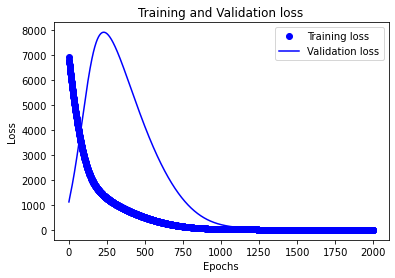

In [72]:
plt.plot( epochs, loss, 'bo', label = 'Training loss' )
plt.plot( epochs, val_loss, 'b', label = 'Validation loss' )
plt.title( 'Training and Validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

## 5. 예측

In [73]:
print( model.predict( X_test ) )

[[71.79654 ]
 [81.617714]]


# 4. 로지스틱 회귀( Logistic Regression ) 모델

# One-Hot Encoding

- 머신러닝/딥러닝을 이용한 학습을 수행시 컴퓨터에게 인식시키게 하기 위하여 단 하나의 값만 True( 1 )이고 나머지는 모두 False( 0 )인 인코딩을 말한다.
- One-Hot Encoding의 결과를 같는 벡터( vector )를 One-Hot vector라 한다.
- 예) 값  
                            [ 1, 2, 3 ]
      One-Hot Encoding  
                        1 : [ 1  0  0 ]  
                        2 : [ 0  1  0 ]  
                        3 : [ 0  0  1 ]  

In [83]:
data = np.array( [ 0, 1, 0, 1, 2 ] ).reshape( -1, 1 )
data

array([[0],
       [1],
       [0],
       [1],
       [2]])

### One-Hot Encoding

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
one_hot = OneHotEncoder()
one_hot.fit( data )

OneHotEncoder()

In [85]:
one_hot_data = one_hot.transform( data ).toarray()

In [86]:
one_hot_data

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### One-Hot Decoding

In [87]:
data_recover = np.argmax( one_hot_data, axis = 1 ).reshape( -1, 1 )

In [88]:
data_recover

array([[0],
       [1],
       [0],
       [1],
       [2]], dtype=int64)

## 로지스틱 회귀( Logistic Regression ) - 이진분류

- 일상 속에서 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많다.
- 예를 들어 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금할 수도 있고, 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지를 분류하는 문제도 그렇다.
- 이렇게 둘 중에서 하나를 결정하는 문제를 이진 분류( Binary Classification )라 한다.
- 이와 같은 이진 분류( Binary Classification )를 해결하기 위한 대표적인 알고리즘이 로지스틱 회귀( Logistic Regression )이다.

### 1. 이진 분류( Binary Classification )

- 선형 회귀( Linear Regression )에서 공부 시간과 성적간의 관계를 직선의 방정식으로 표현한다는 가설 하에, 주어진 데이터로부터 가중치 W( Weight )와 편향 b( bias )를 찾아 데이터를 가장 잘 표현하는 직선을 찾았다.
- 둘 중 하나의 선택지 중에서 정답을 고르는 이진 분류 문제는 직선으로 표현하는 것이 적절하지 않다.

- 학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정해본다.
- 시험 성적이 X라면, 합/불 결과는 y입니다. 이 시험의 커트라인은 공개되지 않았는데 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자 합시다.

|score( X )|result( y )|
|---:|:---:|
|45|불학격|
|50|불합격|
|55|불합격|
|60|합격|
|65|합격|
|70|합격|

- 이 데이터에서 합격을 1, 불합격을 0이라고 하였을때 그래프는 다음과 같다.

![Alt text]( LogisticRegression.png )

- 이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현된다.
- 이러한 X와 y의 관계를 표현하기 위해서는 직선을 표현하는 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요하다.
- 직선을 사용할 경우 보통 분류 작업이 제대로 동작하지 않는다.
- 또한 이번 예와 같이 실제값 y가 0 또는 1이라는 두 가지 경우밖에 없은 경우, 문제를 해결 하기 위해서는 예측값이 0과 1사이의 값을 가지도록 하는 것이 보편적이다.
- 0과 1사이의 값을 확률로 해석하면 문제를 풀기가 훨씬 용이해진다.
- 최종 예측값이 0.5보다 작다면 0으로 예측했다고 판단하고, 0.5보다 크면 1로 예측했다고 판단할 수 있기 때문이다.
- 하지만 선형 회귀의 경우 y값이 음의 무한대부터 양의 무한대와 같은 큰 수들고 가질 수 있는데 이는 분류 문제에는 적합하지 않은 두번째 이유이다.
- 0과 1사이의 값을 가지면서, S자 형태로 그려지는 조건을 중족하는 함수가 있는데 시그모이드 함수( Sigmoid function ) 이다.

### 2. 시그모이드 함수( Sigmoid Function )

- 시그모이드 함수의 식은 다음과 같다.

\begin{equation*}
    H( X ) = \frac{1}{1+e^-(WX+b)} = sigmoid( WX + b ) = \alpha( WX + b )
\end{equation*}

- 이 식은 이진 분류 문제의 가설( Hypothesis )이 된다.
- e( e = 2.718281... )는 자연상수이다.
- 이진 분류에서도 주어진 데이터에 가장 적합한 가중치 W( weight )와 편향 b( bias )이다. 머신러닝/딥러닝 알고리즘이 하는 것은 결국은 주어진 데이터에 적합한 가중치 W( weight )와 편향 b( bias )를 구하는 것이다.

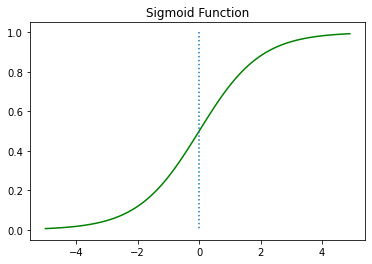

In [89]:
# W가 1, b가 0인 경우의 sigmoid 함수에 의한 그래프
def sigmoid( X ):
    return 1 / ( 1 + np.exp( -X ) )

X = np.arange( -5.0, 5.0, 0.1 )
y = sigmoid( X )

plt.plot( X, y, 'g' )
plt.plot( [ 0, 0 ], [ 1.0, 0.0 ], ':' ) # 가운데 점선 추가
plt.title( 'Sigmoid Function' )

plt.show()

- 위의 그래프를 통해 시그모이드 함수는 출력값이 0과 1사이의 값으로 조정하여 반환한다. 마치 S자 모양을 연상할 수 있다.

- 시그모이드 함수를 이용하여 그래프를 그렸을 때 가중치 W( weight )와 편향 b( bias )가 어떤 의미를 가지는지 그래프로 확인해보면

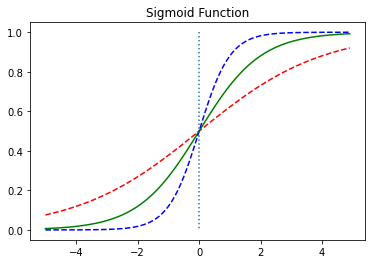

In [90]:
# W값의 변화
y1 = sigmoid( 0.5 * X )
y2 = sigmoid( X )
y3 = sigmoid( 2 * X )

plt.plot( X, y1, 'r', linestyle = '--' ) # W값이 0.5일 때
plt.plot( X, y2, 'g' ) # W값이 1일 때
plt.plot( X, y3, 'b', linestyle = '--' ) # W값이 2일 때
plt.plot( [ 0, 0 ], [ 1.0, 0.0 ], ':' )
plt.title( 'Sigmoid Function' )

plt.show()

- 위의 그래프에서 W값에 따라 그래프의 경사도가 변하는 것을 볼 수 있다.
- 선형 회귀에서는 가중치 W( weight )는 직선의 기울기를 의미했지만, 이진 분류에서는 그래프의 경사도을 결정한다.
- W값이 커지면 경사도가 커지고, W값이 작아지면 경사도가 완만해 진다.

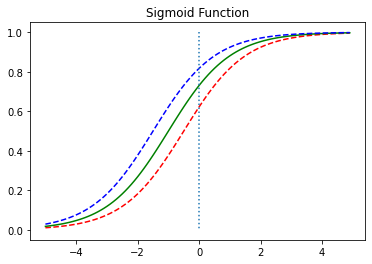

In [91]:
# b값의 변화에 따른 그래프의 이동
y1 = sigmoid( X + 0.5 )
y2 = sigmoid( X + 1 )
y3 = sigmoid( X + 1.5 )

plt.plot( X, y1, 'r', linestyle = '--' ) # b값 0.5
plt.plot( X, y2, 'g' ) #b값 1
plt.plot( X, y3, 'b', linestyle = '--' ) # b값 1.5
plt.plot( [ 0, 0 ], [ 1.0, 0.0 ], ':' )
plt.title( 'Sigmoid Function' )

plt.show()

- 시그모이드 함수는 입력값이 커지면 1에 수렴하고, 입력값이 작아지면 0에 수렴한다.
- 0부터 1까지의 값을 가지는데 출력값이 0.5이상이면 1( True ), 0.5 이하이면 0( False )로 만들어진 이진 분류 문제로 사용할 수 있다.
- 이를 확률이라고 생각하면 해당 범주에 속할 확률이 50%가 넘으면, 해당 범주라고 판단하고 50%보다 낮으면 아니라고 판단할 수 있다.

### 3. 비용 함수( Cost Function )

- 로지스틱 회귀 또한 경사 하강법을 사용하여 가중치 W( weight )와 편향 b( bias )를 찾아내지만, 비용 함수로는 평균 제곱 오차( MSE )를 사용하지 않는다.
- 그 이유는 시그모이드 함수에 비용 함수를 평균 제곱 오차( MSE )로 하여 그래프를 그리면 다음과 비슷한 형태가 되기 때문이다.

![Alt text]( localmimum.png )

- 로지스틱 회귀에서 평균 제곱 오차( MSE )를 비용 함수로 사용하면 경사 하강법을 사용하였을때 자칫 잘못하면 찾고자 하는 최소값이 아니 잘못된 최소값에 빠질 수 있다.
- 이를 글로별 미니멈( global minimum )이 아닌 특정 구역에서의 최소값인 로컬 미니멈( local minimum )에 도달했다고 한다.
- 이는 cost가 최소가 되는 가중치 W( weight )와 편향 b( bias )를 찾는다는 비용 함수의 목적에 맞지 않는다.